In [2]:
import numpy as np
import scipy
import matplotlib.pyplot as plt
from scipy import fftpack


"""Generate random dnesity in 2d plane
    with power spectrum P(k) ~ 1/k^3
    
    1. for kx,ky: get |k|
    2. A(k) = |delta(k)| ~ rayleigh(1), phi(k) ~ U(0,2pi)
    3. multiply A(k) by sqrt{Pk} 
    4. FT-1 to get delta(x)
"""

'Generate random dnesity in 2d plane\n    with power spectrum P(k) ~ 1/k^3\n    \n    1. for kx,ky: get |k|\n    2. A(k) = |delta(k)| ~ rayleigh(1), phi(k) ~ U(0,2pi)\n    3. multiply A(k) by sqrt{Pk} \n    4. FT-1 to get delta(x)\n'

In [3]:
nx = 64
ny = 64
L0 = 1.

# generate a rayleigh distributed magnitude and uniform phase

# Pk = kk**(-3.)
kk = np.arange(-nx//2+1,nx//2+1)

# kx and ky: 
kx1d = np.zeros(nx)
kx1d[:nx//2+1] = kk[nx//2-1:]
kx1d[nx//2+1:] = kk[:nx//2-1]
kx1d *= 2*np.pi/ L0

# get  agrid of kx and ky:
kxky = np.meshgrid(kx1d,kx1d) #.reshape(1,nx*ny)

kk = np.linalg.norm(kxky,axis=0)


Pk = kk**(-3.)
Pk[0,0] = 0



/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:22: RuntimeWarning: divide by zero encountered in power


In [4]:

# now generate rayleigh-distributed lengths:
Amp = np.random.rayleigh(1,(nx,ny))
Amp *= Pk

phase = np.random.rand(nx*ny).reshape((nx,ny)) * 2*np.pi

densktmp = Amp * np.exp(phase*1.0j)


# using fig. A.2 from D. Jeong PhD Thesis to fill dens[k]
densk = np.zeros((nx,ny),dtype='complex')

iNy = nx//2

densk[:iNy+1,:] = densktmp[:iNy+1,:]
densk[0,iNy+1:] = densktmp[0,iNy-1:0:-1].conj()
densk[iNy,iNy+1:] = densktmp[iNy+1,iNy-1:0:-1].conj()


densk[iNy+1:,1:iNy] = densktmp[iNy-1:0:-1,-1:iNy:-1].conj()
densk[iNy+1:,iNy+1:] = densktmp[iNy-1:0:-1,iNy-1:0:-1].conj()
densk[iNy+1:,0] = densktmp[iNy-1:0:-1,0].conj()
densk[iNy+1:,iNy] = densktmp[iNy-1:0:-1,iNy].conj()


In [5]:
# Get inverse FFT: 

densr = fftpack.fft2(densk)

print (densr.real.min(),densr.real.max())

print (densr.imag.min(),densr.imag.max())



-0.02755919861916063 0.021199287432834286
-1.6077318181939181e-06 1.4425312080209978e-06


0.00019528215212054356 0.00654415621252864
(64, 64)
0.9724408013808393 1.0211992874328344


Text(0, 0.5, '$y$')

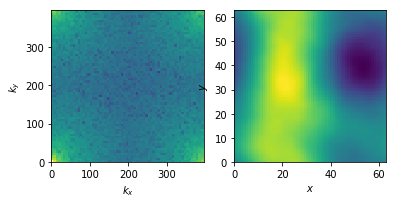

In [8]:
from matplotlib import colors 
fig,ax = plt.subplots(1,2)

normdensk = np.abs(densk)

normdensr = np.abs(densr)

# check if normalization is correct:

print (normdensk.std(),normdensr.std())

kx = kx1d.copy()
kx[:iNy+1] = kx1d[:iNy+1]
kx[iNy+1:] += 2*np.pi/L0 * nx
# print (kk)


# print (1+normdensk)
print (np.shape(normdensk))

iax = ax[0]
iax.pcolormesh(kx,kx,normdensk.T,norm=colors.LogNorm(vmin=1e-10,vmax=0.02))
# iax.pcolormesh(kk,kk,normdensk.T) 
iax.set_aspect(1)
iax.set_ylabel("$k_y$")
iax.set_xlabel("$k_x$")

xx = np.arange(nx)*L0
print ((1+densr.real.min()),(1+densr.real.max()))

iax = ax[1]
# iax.pcolormesh(xx,xx,np.reshape(densr,(nx,ny)))
iax.set_aspect(1)
# iax.pcolormesh(kx,kx,kk) 
iax.pcolormesh(xx,xx,(1+densr.real.T)) #,norm=colors.LogNorm(vmin=.95,vmax=1.05))
iax.set_xlabel("$x$")
iax.set_ylabel("$y$")
